In [267]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan

In [454]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### quick view on all dataset

#### 'countries' dataset

In [5]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)

In [270]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


#### 'matches' dataset

In [7]:
with sqlite3.connect('database.sqlite') as con:
    matches = pd.read_sql_query("SELECT * from Match", con)

In [272]:
matches.isnull().sum()

id               0
country_id       0
league_id        0
season           0
stage            0
              ... 
SJD           8882
SJA           8882
VCH           3411
VCD           3411
VCA           3411
Length: 98, dtype: int64

In [9]:
matches.shape

(25979, 115)

In [10]:
columns = list(matches.columns)

- Drop entire columns that have too much missing data

In [11]:
drop_list = [i for i in columns if matches[i].isnull().sum() > 10000]

In [12]:
matches.drop(columns = drop_list, inplace = True)
matches.shape

(25979, 98)

In [443]:
matches.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5


In [14]:
matches['id'].is_unique

True

- Get rid of irrelevant gambling data

In [446]:
matches_player_init = matches.loc[:, 'id':'away_player_11']

- Drop player coordination data (temporarily)

In [17]:
X_h_col = []
for i in range(1,12):
    X_h_col.append('home_player_X' + str(i))

In [18]:
X_a_col = []
for i in range(1,12):
    X_a_col.append('away_player_X' + str(i))

In [19]:
Y_h_col = []
for i in range(1,12):
    Y_h_col.append('home_player_Y' + str(i))

In [20]:
Y_a_col = []
for i in range(1,12):
    Y_a_col.append('away_player_Y' + str(i))

In [447]:
matches_player = matches_player_init.drop(columns = X_h_col + X_a_col + Y_h_col + Y_a_col)

In [448]:
matches_player.dropna(inplace = True)

In [452]:
matches_player.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0


- Comfirm no missing data

In [455]:
matches_player.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_1       0
home_player_2       0
home_player_3       0
home_player_4       0
home_player_5       0
home_player_6       0
home_player_7       0
home_player_8       0
home_player_9       0
home_player_10      0
home_player_11      0
away_player_1       0
away_player_2       0
away_player_3       0
away_player_4       0
away_player_5       0
away_player_6       0
away_player_7       0
away_player_8       0
away_player_9       0
away_player_10      0
away_player_11      0
dtype: int64

- Transform date column to show year only

In [25]:
matches_player['date'] = matches_player.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [242]:
matches_player['date'].value_counts()

2015    3052
2012    2928
2014    2887
2013    2758
2011    2732
2010    2607
2009    2130
2016    1474
2008     806
Name: date, dtype: int64

In [456]:
matches_player.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0


In [27]:
matches_player.shape

(21374, 33)

#### 'leagues' dataset

In [28]:
with sqlite3.connect('database.sqlite') as con:
    leagues = pd.read_sql_query("SELECT * from League", con)

In [29]:
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [30]:
diff = leagues[leagues['id'] != leagues['country_id']]

In [31]:
diff

,id,country_id,name


- Confirmed that 'id' and 'country_id' contain the same information, so column 'id' can be dropped.

In [32]:
leagues.drop(columns = 'id', inplace = True)

#### 'teams' dataset

In [33]:
with sqlite3.connect('database.sqlite') as con:
    teams = pd.read_sql_query("SELECT * from Team", con)

In [34]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [35]:
teams.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

#### 'team_detail' dataset

In [36]:
with sqlite3.connect('database.sqlite') as con:
    team_detail = pd.read_sql_query("SELECT * from Team_Attributes", con)

In [37]:
team_detail.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [38]:
team_detail.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [458]:
team_detail.dropna(inplace = True)

In [459]:
team_detail.isna().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

- Transform date column to show year only

In [39]:
team_detail['date'] = team_detail.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [40]:
team_detail.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


#### 'player' dataset

In [41]:
with sqlite3.connect('database.sqlite') as con:
    player = pd.read_sql_query("SELECT * from Player", con)

In [42]:
player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [43]:
player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [159]:
player.player_api_id.is_unique

True

- Transform date column to show year only

In [44]:
player['birthday'] = player.apply(lambda x:datetime.strptime(x['birthday'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [45]:
player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992,182.88,187


#### 'player_detail' dataset

In [465]:
with sqlite3.connect('database.sqlite') as con:
    player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)

In [87]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [466]:
player_detail.dropna(inplace = True)

In [467]:
player_detail.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


- Transform date column to show year only

In [468]:
player_detail['date'] = player_detail.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [469]:
player_detail['date'].value_counts()

2013    38830
2014    32792
2015    31818
2007    14331
2016    14098
2012    12625
2011    11860
2010    10392
2009     8360
2008     5248
Name: date, dtype: int64

In [470]:
player_detail.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

- Too many columns! Drop some ... arbitrarily .

In [471]:
player_detail.drop(columns = ['potential','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], inplace = True)

<AxesSubplot:>

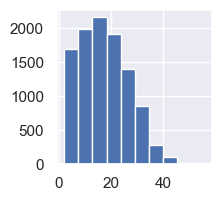

In [472]:
player_detail['player_api_id'].value_counts().hist(figsize = (2,2))

Note: 'player_api_id' has duplicates. Plot shows most of the players have 0-20 records of slightly different ratings.

- Run a overall check-out

In [136]:
to_plot = ['overall_rating','attacking_work_rate','defensive_work_rate', 
           'crossing', 'finishing', 'long_passing', 'ball_control',
           'acceleration', 'sprint_speed','agility','vision', 'sliding_tackle']

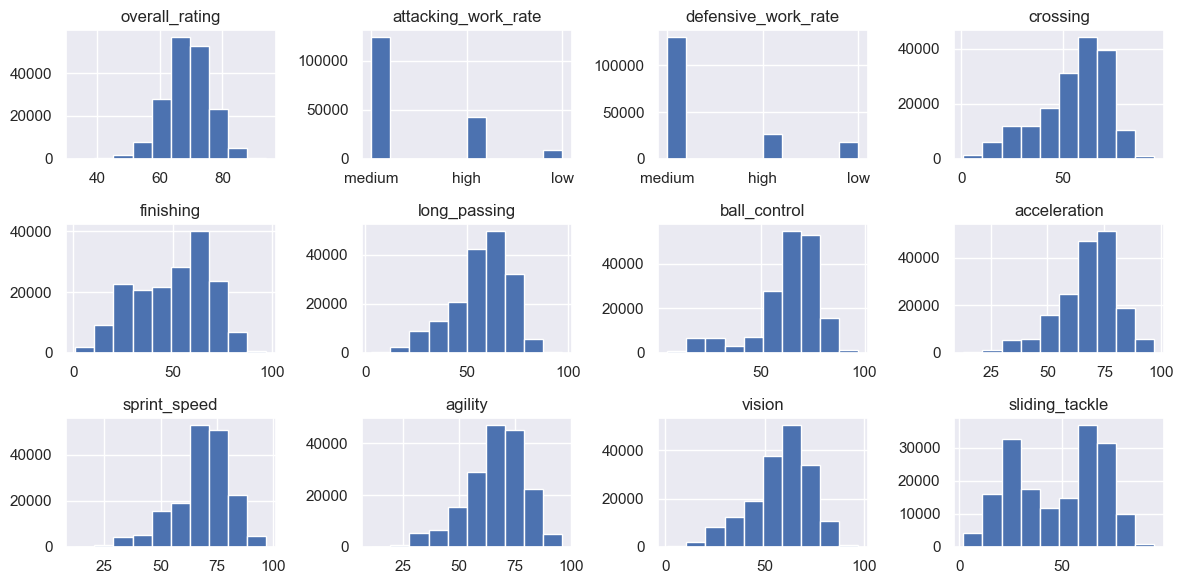

In [460]:
fig, ax = plt.subplots(3, 4, figsize = (12, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    ax.hist(player_detail.loc[:,to_plot[index]])
    ax.set_title(to_plot[index])
plt.tight_layout()

Note: The categories for attacking_work_rate and defensive_work_rate are not right

In [461]:
player_detail.attacking_work_rate.value_counts()

medium    124871
high       42751
low         8539
Name: attacking_work_rate, dtype: int64

In [477]:
player_detail.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

Note: Drop row is one way, but that will remove useful information in other columns, so I replaced messy values with 'None'.

In [474]:
player_detail.loc[~player_detail['attacking_work_rate'].isin (['high', 'medium', 'low']), 'attacking_work_rate'] = 'None'

In [478]:
player_detail.loc[~player_detail['defensive_work_rate'].isin (['high', 'medium', 'low']), 'defensive_work_rate'] = 'None'

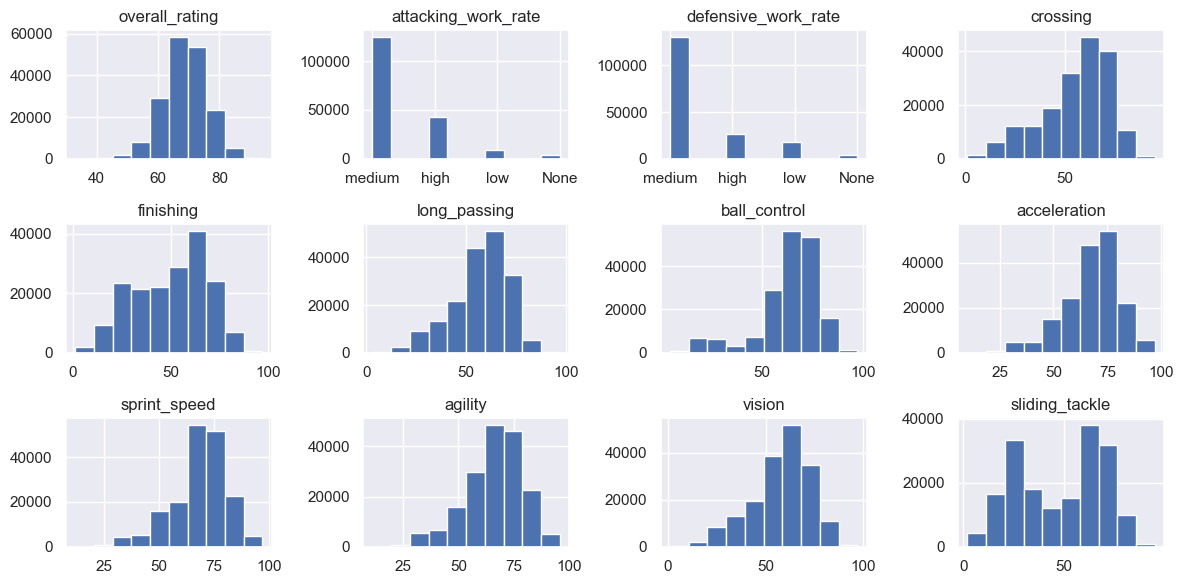

In [479]:
fig, ax = plt.subplots(3, 4, figsize = (12, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    ax.hist(player_detail.loc[:,to_plot[index]])
    ax.set_title(to_plot[index])
plt.tight_layout()

jupyter notebook dies when I run below. Save for later.

In [51]:
# mapping_foot = {'right': 0, 'left': 1}
# mapping_attack = {'low': 0, 'medium': 1, 'high': 2}
# mapping_defence = {'low': 0, 'medium': 1, 'high': 2}

In [52]:
# player_detail.replace({'preferred_foot':mapping_foot, 'attacking_work_rate':mapping_attack, 'defensive_work_rate':mapping_defence})

### Combine Datasets

- First I need to confirm that the player columns in 'matches_player' are players who played the game.

In [53]:
home_player_col = []
for i in range(1,12):
    home_player_col.append('home_player_' + str(i))

In [54]:
away_player_col = []
for i in range(1,12):
    away_player_col.append('away_player_' + str(i))

In [55]:
def get_info(index):
    record = matches_player.iloc[index,:]
    
    home_team_id = record['home_team_api_id']
    home_team = teams[teams['team_api_id']==home_team_id]['team_long_name'].item()
    away_team_id = record['away_team_api_id']
    away_team = teams[teams['team_api_id']==away_team_id]['team_long_name'].item()
    
    home_player_info = {}
    for col in home_player_col:
        player_id = record[col]
        home_player_info[col] = player[player['player_api_id']==player_id]['player_name'].item()
        
    away_player_info = {}
    for col in home_player_col:
        player_id = record[col]
        away_player_info[col] = player[player['player_api_id']==player_id]['player_name'].item()
        
    print(home_team)
    print(home_player_info.values())
    print(away_team)
    print(away_player_info.values())

In [56]:
get_info(1)

KSV Cercle Brugge
dict_values(['Bram Verbist', 'Denis Viane', 'Anthony Portier', 'Frederik Boi', 'Vusumuzi Prince Nyoni', 'Thomas Buffel', 'Sergiy Serebrennikov', 'Tony Sergeant', 'Oleg Iachtchouk', 'Stijn De Smet', 'Honour Gombami'])
Club Brugge KV
dict_values(['Bram Verbist', 'Denis Viane', 'Anthony Portier', 'Frederik Boi', 'Vusumuzi Prince Nyoni', 'Thomas Buffel', 'Sergiy Serebrennikov', 'Tony Sergeant', 'Oleg Iachtchouk', 'Stijn De Smet', 'Honour Gombami'])


Note: Fact checking by searching on internet confirms that the player columns in 'matches_player' are players who played the game.

- Now I try to join dataset 'matches_player' and team average attributes from 'player' and 'player_detail'

In [481]:
matches_player.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0


I got missing data problem in later process so I came back here to clean again

In [422]:
league = matches.league_id.unique()

In [482]:
for l in league:
    demo = matches_player[matches_player['league_id'] == l]
    demo.reset_index(inplace = True, drop = True)
    drop_list = []
    for i in range(len(demo)):
        row = demo.iloc[i, :]   
        for col in home_player_col:
            player_id = row[col]
            if (player_id in player.player_api_id.values) & (player_id in player_detail.player_api_id.values):
                pass
            else:
                drop = True
        if drop:
            drop_list.append(i)
    demo_new = demo.drop(drop_list)
    print(demo_new.shape)

(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)


Note: this is checking every match to see if all players have attribute records in the 'player' and 'player_detail' dataset. All matches failed the test. Sad.

How about just check the 'player_detail' dataset?

In [427]:
for l in league:
    demo = matches_player[matches_player['league_id'] == l]
    demo.reset_index(inplace = True, drop = True)
    drop_list = []
    for i in range(len(demo)):
        row = demo.iloc[i, :]   
        for col in home_player_col:
            player_id = row[col]
            if player_id in player_detail.player_api_id.values:
                pass
            else:
                drop = True
        if drop:
            drop_list.append(i)
    demo_new = demo.drop(drop_list)
    print(demo_new.shape)

(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)
(0, 33)


Note: Still failed.

- Check how bad the situation is exactly

In [ ]:
demo = matches_player[matches_player['league_id'] == l]
demo.reset_index(inplace = True, drop = True)

In [435]:
exist_data = {}

In [436]:
for i in range(len(demo)):
    row = demo.iloc[i, :]
    exist_home = 0
    exist_away = 0

    for col in home_player_col:
        player_id = row[col]
        if (player_id in player.player_api_id.values) & (player_id in player_detail.player_api_id.values):
            exist_home += 1
    for col in away_player_col:
        player_id = row[col]
        if (player_id in player.player_api_id.values) & (player_id in player_detail.player_api_id.values):
            exist_away += 1           

    exist_data[i] = [exist_home, exist_away]

        

In [439]:
exist_data_df = pd.DataFrame.from_dict(exist_data)

In [440]:
exist_data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Note: maybe I can use the matches that have > 8 players with records on each team. Does the plan of getting averge still works? Maybe median is the way.

Below were my attempt to get player's records from year that's close to the match year, then count the average of the whole team. Need to adjust the code now.

In [244]:
def get_closest_date(date_obj, date_list):
    return date_list[min(range(len(date_list)), key = lambda i: abs(date_list[i]-date_obj))]

In [ ]:
for i in range(50):
    row = demo.iloc[i, :] 
    for col in home_player_col:
        player_id = row[col]
        home_player_info = player[player['player_api_id']==player_id][['birthday', 'height', 'weight']]
        date_player = get_closest_date(row['date'], list(player_detail[player_detail.player_api_id==player_id].date))
        home_player_detail_info = player_detail[(player_detail.player_api_id == player_id) & (player_detail.date ==
                                           date_player)].loc[:,'overall_rating':]
    

In [ ]:
def get_avg(row):
       
    home_player_info = {}
    for col in home_player_col:
        player_id = row[col]
        home_player_info[col] = player[player['player_api_id']==player_id]['player_name'].item()
        
    away_player_info = {}
    for col in home_player_col:
        player_id = record[col]
        away_player_info[col] = player[player['player_api_id']==player_id]['player_name'].ite